In [1]:
# variavel alvo( preço venda disel)
# importar dados
#importar bibliotecas
# aplicar limpeza e transformação dos dados
# aplicar modelo
# demonstrar resultados


In [15]:
# instalar scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as m
# Imports para cálculos estatísticos
import scipy
#from scipy.stats import kurtosis, skew, shapiro
import warnings
warnings.filterwarnings("ignore")

# Imports para formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10


#formatando valores com duas casas decimais
pd.options.display.float_format = '{:.2f}'.format


In [22]:
pd.set_option('display.max_columns',None)

In [24]:
# importando dados
dados_diesel=pd.read_csv('precos-semestrais-ca-2022-01.csv',encoding='ISO-8859-1', sep = ';')

In [25]:
# onde estava a variavel tempo

In [26]:
#cabeçalho
dados_diesel.head()

,ï»¿Regiao_Sigla,Estado _Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data_Coleta,Valor_Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GASOLINA,03/01/2022,6.99,NaN,R$ / litro,VIBRA ENERGIA
1,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,ETANOL,03/01/2022,5.99,NaN,R$ / litro,VIBRA ENERGIA
2,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,DIESEL,03/01/2022,6.09,NaN,R$ / litro,VIBRA ENERGIA
3,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GASOLINA ADITIVADA,03/01/2022,7.05,NaN,R$ / litro,VIBRA ENERGIA
4,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,DIESELS10,03/01/2022,6.12,NaN,R$ / litro,VIBRA ENERGIA


In [27]:
# definidno Variavel data_coleta como indice
dados_diesel.set_index('Data_Coleta', inplace = True)
dados_diesel.head(3)

,ï»¿Regiao_Sigla,Estado _Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Valor_Venda,Valor de Compra,Unidade de Medida,Bandeira
Data_Coleta,,,,,,,,,,,,,,,
03/01/2022,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,GASOLINA,6.99,NaN,R$ / litro,VIBRA ENERGIA
03/01/2022,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,ETANOL,5.99,NaN,R$ / litro,VIBRA ENERGIA
03/01/2022,N,AC,RIO BRANCO,AUTO POSTO AMAPA - EIRELI,00.529.581/0001-53,VIA CHICO MENDES,3570,NaN,AREAL,69906-119,DIESEL,6.09,NaN,R$ / litro,VIBRA ENERGIA


In [6]:
#transformando variavel para o tipo data
#pd.to_datetime(dados_diesel['Data_Coleta'])

In [28]:
#ultimas linhas
dados_diesel.tail()

,ï»¿Regiao_Sigla,Estado _Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Valor_Venda,Valor de Compra,Unidade de Medida,Bandeira
Data_Coleta,,,,,,,,,,,,,,,
30/06/2022,CO,MT,CUIABA,OZ REVENDEDORA DE COMBUSTIVEIS LTDA,36.757.198/0001-08,AVENIDA SENADOR METELLO,868,NaN,CENTRO-SUL,78020-600,GASOLINA,6.49,NaN,R$ / litro,BRANCA
30/06/2022,NE,MA,CAXIAS,POSTAO COMERCIO DE COMBUSTIVEIS LTDA,31.597.569/0001-00,RODOVIA BR-316,S/N,KM 552 SALA A,VOLTA REDONDA,65606-525,GASOLINA ADITIVADA,6.99,NaN,R$ / litro,BRANCA
30/06/2022,NE,MA,CAXIAS,POSTAO COMERCIO DE COMBUSTIVEIS LTDA,31.597.569/0001-00,RODOVIA BR-316,S/N,KM 552 SALA A,VOLTA REDONDA,65606-525,DIESELS10,7.59,NaN,R$ / litro,BRANCA
30/06/2022,NE,MA,CAXIAS,POSTAO COMERCIO DE COMBUSTIVEIS LTDA,31.597.569/0001-00,RODOVIA BR-316,S/N,KM 552 SALA A,VOLTA REDONDA,65606-525,DIESEL,7.55,NaN,R$ / litro,BRANCA
30/06/2022,NE,MA,CAXIAS,POSTAO COMERCIO DE COMBUSTIVEIS LTDA,31.597.569/0001-00,RODOVIA BR-316,S/N,KM 552 SALA A,VOLTA REDONDA,65606-525,GASOLINA,6.99,NaN,R$ / litro,BRANCA


In [29]:
#dados das tabelas 
dados_diesel.info()
dados_diesel.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 529424 entries, 03/01/2022 to 30/06/2022
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ï»¿Regiao_Sigla    529424 non-null  object 
 1   Estado _Sigla      529424 non-null  object 
 2   Municipio          529424 non-null  object 
 3   Revenda            529424 non-null  object 
 4   CNPJ da Revenda    529424 non-null  object 
 5   Nome da Rua        529424 non-null  object 
 6   Numero Rua         529211 non-null  object 
 7   Complemento        113936 non-null  object 
 8   Bairro             527991 non-null  object 
 9   Cep                529424 non-null  object 
 10  Produto            529424 non-null  object 
 11  Valor_Venda        529424 non-null  float64
 12  Valor de Compra    0 non-null       float64
 13  Unidade de Medida  529424 non-null  object 
 14  Bandeira           529424 non-null  object 
dtypes: float64(2), object(13)
memory usage: 64.

ï»¿Regiao_Sigla           0
Estado _Sigla             0
Municipio                 0
Revenda                   0
CNPJ da Revenda           0
Nome da Rua               0
Numero Rua              213
Complemento          415488
Bairro                 1433
Cep                       0
Produto                   0
Valor_Venda               0
Valor de Compra      529424
Unidade de Medida         0
Bandeira                  0
dtype: int64

In [30]:
#informações contidas na variavel produto pretendemos analisar apenas os valores diesel
dados_diesel['Produto'].value_counts()

GASOLINA              132487
ETANOL                116822
DIESELS10             110098
GASOLINA ADITIVADA     99787
DIESEL                 60715
GNV                     9515
Name: Produto, dtype: int64

In [31]:
dados_diesel=dados_diesel.dropna(axis=1,how='all')
dados_diesel.drop('Complemento', axis=1, inplace=True)
dados_diesel.drop('Bairro', axis=1, inplace=True)
dados_diesel.drop('Bandeira', axis=1, inplace=True)
dados_diesel.drop('ï»¿Regiao_Sigla', axis=1, inplace=True)
dados_diesel.drop('Estado _Sigla', axis=1, inplace=True)
dados_diesel.drop('Municipio', axis=1, inplace=True)
dados_diesel.drop('Revenda', axis=1, inplace=True)
dados_diesel.drop('CNPJ da Revenda', axis=1, inplace=True)
dados_diesel.drop('Nome da Rua', axis=1, inplace=True)
dados_diesel.drop('Numero Rua', axis=1, inplace=True)
dados_diesel.drop('Cep', axis=1, inplace=True)
dados_diesel.drop('Unidade de Medida', axis=1, inplace=True)
#dados_diesel=dados_diesel.drop(columns=[,,,,,,,,,,,])
# Filtrando apenas por daddos diesel
dados_diesel=dados_diesel[dados_diesel ['Produto'] .str.contains ('DIESEL')]
#dados_diesel=dados_diesel.dropna(axis=0)


In [32]:
#limpeza realizada, deixamos apenas as variaveis desejadas
dados_diesel['Produto'].value_counts()

DIESELS10    110098
DIESEL        60715
Name: Produto, dtype: int64

In [33]:
#informações após limpeza dos dados
dados_diesel.info()
dados_diesel.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 170813 entries, 03/01/2022 to 30/06/2022
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Produto      170813 non-null  object 
 1   Valor_Venda  170813 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.9+ MB


Produto        0
Valor_Venda    0
dtype: int64

In [34]:
dados_diesel.head()

,Produto,Valor_Venda
Data_Coleta,,
03/01/2022,DIESEL,6.09
03/01/2022,DIESELS10,6.12
03/01/2022,DIESEL,6.09
03/01/2022,DIESELS10,6.12
03/01/2022,DIESEL,6.08


In [35]:
#Mostrando as datas que temos neste df
print('Menor data: ',dados_diesel.index.min())
print('Maior data:', dados_diesel.index.max())


Menor data:  01/02/2022
Maior data: 31/05/2022


In [36]:
# Vamos observar os dados referente a ultima data do nosso conjunto de dados
# Utilizaremos esses dados mais adiante para compor os parametros a simulação de Monte Carlo
display(dados_diesel.loc[dados_diesel.index.max()])

,Produto,Valor_Venda
Data_Coleta,,
31/05/2022,DIESELS10,7.29
31/05/2022,DIESEL,7.29
31/05/2022,DIESELS10,7.19
31/05/2022,DIESEL,6.99
31/05/2022,DIESELS10,7.29
...,...,...
31/05/2022,DIESELS10,7.29
31/05/2022,DIESELS10,7.19
31/05/2022,DIESEL,7.17


In [37]:
# Calculando o percentual de mudança na cotação de fechamento diário das ações
# Ou seja, quanto o valor de fechamento varia de um dia para outro, o retorno diário da ação
retorno_dentropesquisas = dados_diesel["Valor_Venda"].pct_change().dropna()
retorno_dentropesquisas.head

<bound method NDFrame.head of Data_Coleta
03/01/2022    0.00
03/01/2022   -0.00
03/01/2022    0.00
03/01/2022   -0.01
03/01/2022    0.01
              ... 
30/06/2022    0.17
30/06/2022   -0.01
30/06/2022   -0.07
30/06/2022   -0.01
30/06/2022   -0.01
Name: Valor_Venda, Length: 170812, dtype: float64>

In [ ]:
dados_diesel= pd.merge(dados_diesel, retorno_dentropesquisas, how = 'inner', on = 'Data_Coleta')
#dados_diesel.columns = ['Produto','Valor_venda','Variacao_Pesquisas']
#dados_diesel.head()

In [ ]:
#dados_diesel.describe()

,Valor_Venda
count,170813.00
mean,6.46
std,0.76
min,4.07
25%,5.73
50%,6.59
75%,6.99
max,9.15


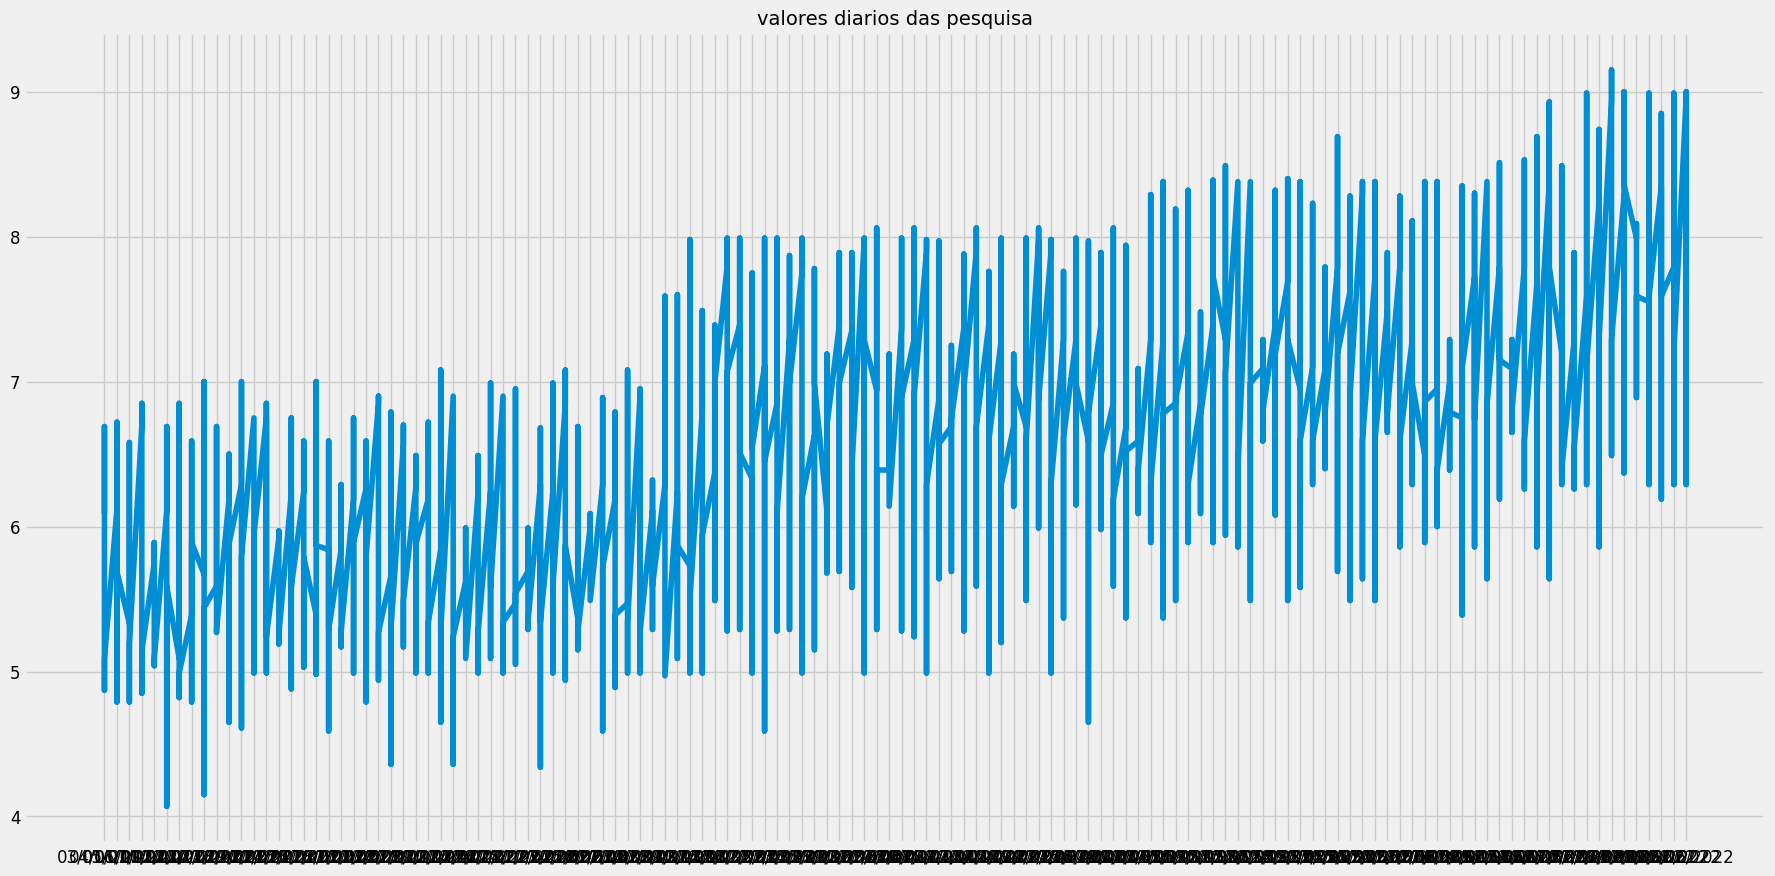

In [ ]:
# Plot
#plt.plot(dados_diesel['Valor_Venda'])
#plt.title("valores diarios das pesquisa", size = 14)
#plt.show()